In [19]:
from sklearn import datasets

df,_ = datasets.load_wine(return_X_y=True, as_frame=True)

In [20]:
df.describe(percentiles=[.01, 0.25, .5, .75, .9, .99])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000
99%,14.472800,5.542200,2.989000,28.500000,141.760000,3.595900,3.791400,0.630000,3.033600,11.018500,1.426900,3.843000,1522.360000


In [21]:
''' A função 'cap_values()' recebe um array (que será o DataFrame), com a indicação do intervalo de interesse para ser analisado,
posteriormente substituindo possíveis outliers. O parâmetro 'lower_quantile' e 'upper_quantile' receberão (em porcentagem) a
quantidade de dados que serão analisadas. Por exemplo, caso o parâmetro 'upper_quantile' seja de 90% (.90), o maior valor aceito
pela função será o maior da análise de 90% dos dados em ordem crescente, substituindo os 10% restantes, que são os verdadeiros
maiores valores. A situação é semelhante para quando for o 'lower_quantile', substituindo valores mais baixos. '''

import numpy as np

def cap_values(array, lower_quantile=0., upper_quantile=1.):
  array = array.copy()
  
  lower_quantile = np.quantile(array, lower_quantile)
  upper_quantile = np.quantile(array, upper_quantile)
  
  array[array < lower_quantile] = lower_quantile
  array[array > upper_quantile] = upper_quantile

  return array

In [22]:
cap_values(df['ash'], upper_quantile=.90).max() # Nota-se que os 10% maiores valores dos dados foram substituídos pelo maior valor dos 90% restantes.

2.7

In [23]:
df.apply(cap_values, upper_quantile=.99).describe(percentiles=[.01, 0.25, .5, .75, .9, .99])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.997054,2.334294,2.363865,19.486517,99.575955,2.292089,2.021252,0.361685,1.586445,5.042848,0.955729,2.610371,745.869213
std,0.804575,1.111002,0.267036,3.314706,13.680946,0.618829,0.979667,0.124067,0.559125,2.272948,0.223969,0.707571,312.129198
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000
99%,14.409044,5.517406,2.935870,28.500000,139.634800,3.537457,3.759522,0.630000,2.976928,10.850255,1.421587,3.825290,1516.692800


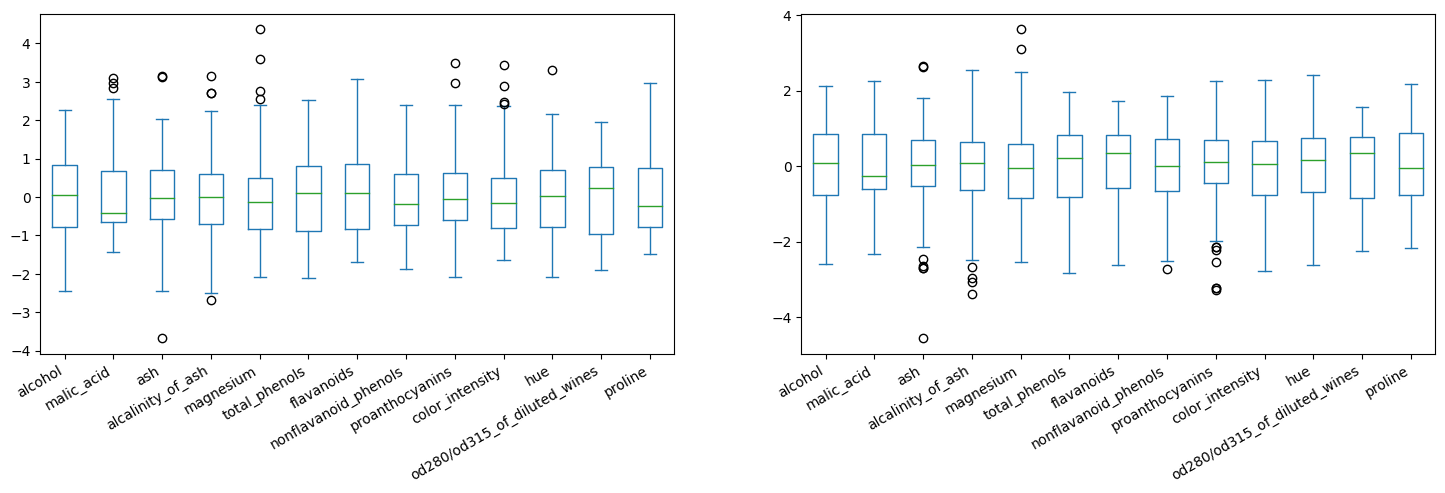

In [24]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

fig, axes = plt.subplots(ncols=2, figsize=(18,5))


df.apply(scale).plot.box(ax=axes[0])
df.apply(np.log).apply(scale).plot.box(ax=axes[1])

fig.autofmt_xdate(rotation=30, ha='right')

plt.show()

In [25]:
from sklearn.preprocessing import power_transform

power_transform(df[['ash']], method='box-cox')

array([[ 0.20965583],
       [-0.84042257],
       [ 1.12048779],
       [ 0.47151443],
       [ 1.90687536],
       [ 0.28414782],
       [ 0.28414782],
       [ 0.88935866],
       [-0.73446283],
       [-0.37675501],
       [-0.26810854],
       [-0.19533979],
       [ 0.13542548],
       [ 0.06145799],
       [ 0.02457322],
       [ 1.23689082],
       [ 1.31480096],
       [ 0.92772401],
       [ 0.39637369],
       [ 0.69847645],
       [-0.3406073 ],
       [ 1.04319542],
       [-0.0489976 ],
       [ 0.54691258],
       [ 0.88935866],
       [ 3.33976221],
       [ 0.92772401],
       [-0.84042257],
       [ 1.62888406],
       [-0.59220702],
       [ 1.23689082],
       [-0.0489976 ],
       [-0.0489976 ],
       [ 1.23689082],
       [ 1.04319542],
       [ 0.13542548],
       [ 1.78737706],
       [ 0.6604899 ],
       [-0.9807165 ],
       [ 0.5091814 ],
       [-0.23175783],
       [-0.91071098],
       [ 0.81281645],
       [-0.30439176],
       [-0.9807165 ],
       [ 0

In [27]:
import pandas as pd

pd.DataFrame(power_transform(df), columns=df.columns)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.530388,-0.435463,0.210464,-1.180400,1.690749,0.819950,1.027153,-0.609851,1.202701,0.451450,0.368811,2.037232,1.062541
1,0.238381,-0.338701,-0.839064,-2.663167,0.188126,0.591646,0.747647,-0.806373,-0.490487,-0.110974,0.412391,1.150327,1.029743
2,0.188751,0.318077,1.119290,-0.243437,0.261461,0.819950,1.192395,-0.421141,1.925646,0.467301,0.325202,0.779080,1.307868
3,1.708049,-0.121469,0.471827,-0.799464,1.020463,2.331036,1.419054,-1.011162,1.038972,1.182895,-0.420745,1.232761,1.810007
4,0.288052,0.523699,1.903702,0.472612,1.282104,0.819950,0.681647,0.342097,0.471707,-0.141340,0.368811,0.405810,0.188985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.874761,1.971560,0.284824,0.325633,-0.206899,-0.983143,-1.469686,1.242295,-0.931816,1.153680,-1.400065,-1.221001,0.205257
174,0.487148,1.353424,0.396838,1.049949,0.333054,-0.777669,-1.308946,0.641775,-0.244461,1.032950,-1.131304,-1.432767,0.237441
175,0.325332,1.516324,-0.411341,0.177532,1.379377,-1.139573,-1.377430,0.641775,-0.356749,1.790358,-1.625052,-1.432767,0.493246
176,0.201155,0.523699,-0.011100,0.177532,1.379377,-1.035059,-1.388902,1.303401,-0.152471,1.581288,-1.579979,-1.363232,0.507388


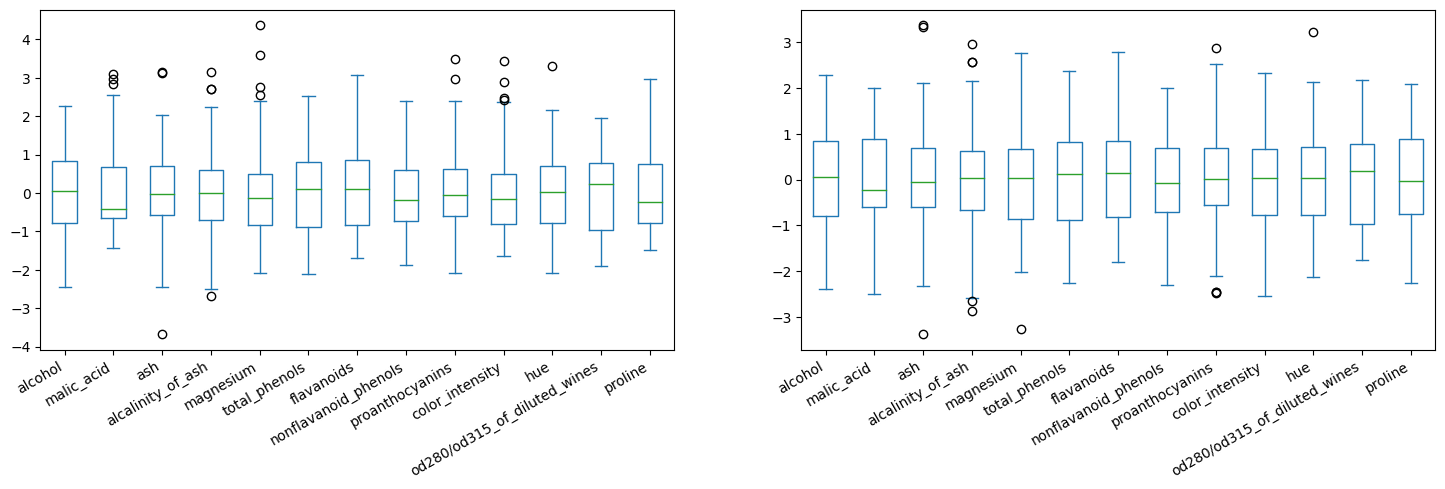

In [28]:
df_boxcox = pd.DataFrame(power_transform(df), columns=df.columns)

fig, axes = plt.subplots(ncols=2, figsize=(18,5))


df.apply(scale).plot.box(ax=axes[0])
df_boxcox.plot.box(ax=axes[1])

fig.autofmt_xdate(rotation=30, ha='right')

plt.show()